# Importing Common and Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

## Importing dataset 

In [2]:
df = pd.read_csv(r"london.csv")

In [3]:
df.head(10)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
5,5,Craven Hill Gardens,420000,Flat / Apartment,403,1,1,1,NaN,London,W2 3EA
6,6,Alfriston Road,1475000,House,1548,4,4,4,NaN,London,SW11 6NW
7,7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF
8,8,Adam & Eve Mews,2500000,House,1308,3,3,3,NaN,London,W8 6UG
9,9,Hornton Street,925000,Flat / Apartment,646,2,2,2,NaN,London,W8 4NT


### removing the unwanted column 

In [4]:
data = df.iloc[:,1:]

In [5]:
data.shape

(3480, 10)

In [6]:
data.head(10)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
5,Craven Hill Gardens,420000,Flat / Apartment,403,1,1,1,NaN,London,W2 3EA
6,Alfriston Road,1475000,House,1548,4,4,4,NaN,London,SW11 6NW
7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF
8,Adam & Eve Mews,2500000,House,1308,3,3,3,NaN,London,W8 6UG
9,Hornton Street,925000,Flat / Apartment,646,2,2,2,NaN,London,W8 4NT


In [7]:
data.isnull().sum()

Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

### tell the information about data 

                                             |          | [  0%]   00:00 -> (? left)


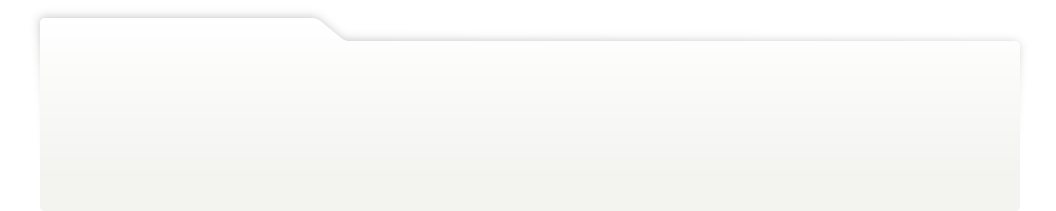
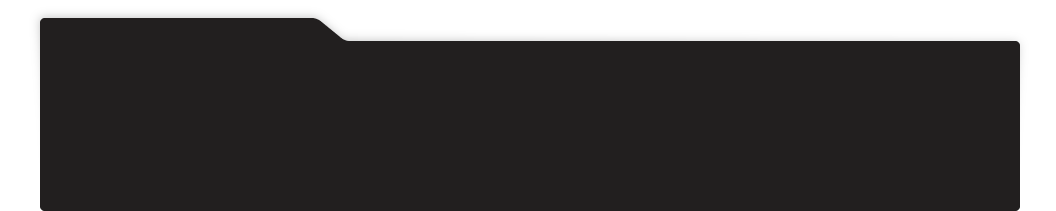
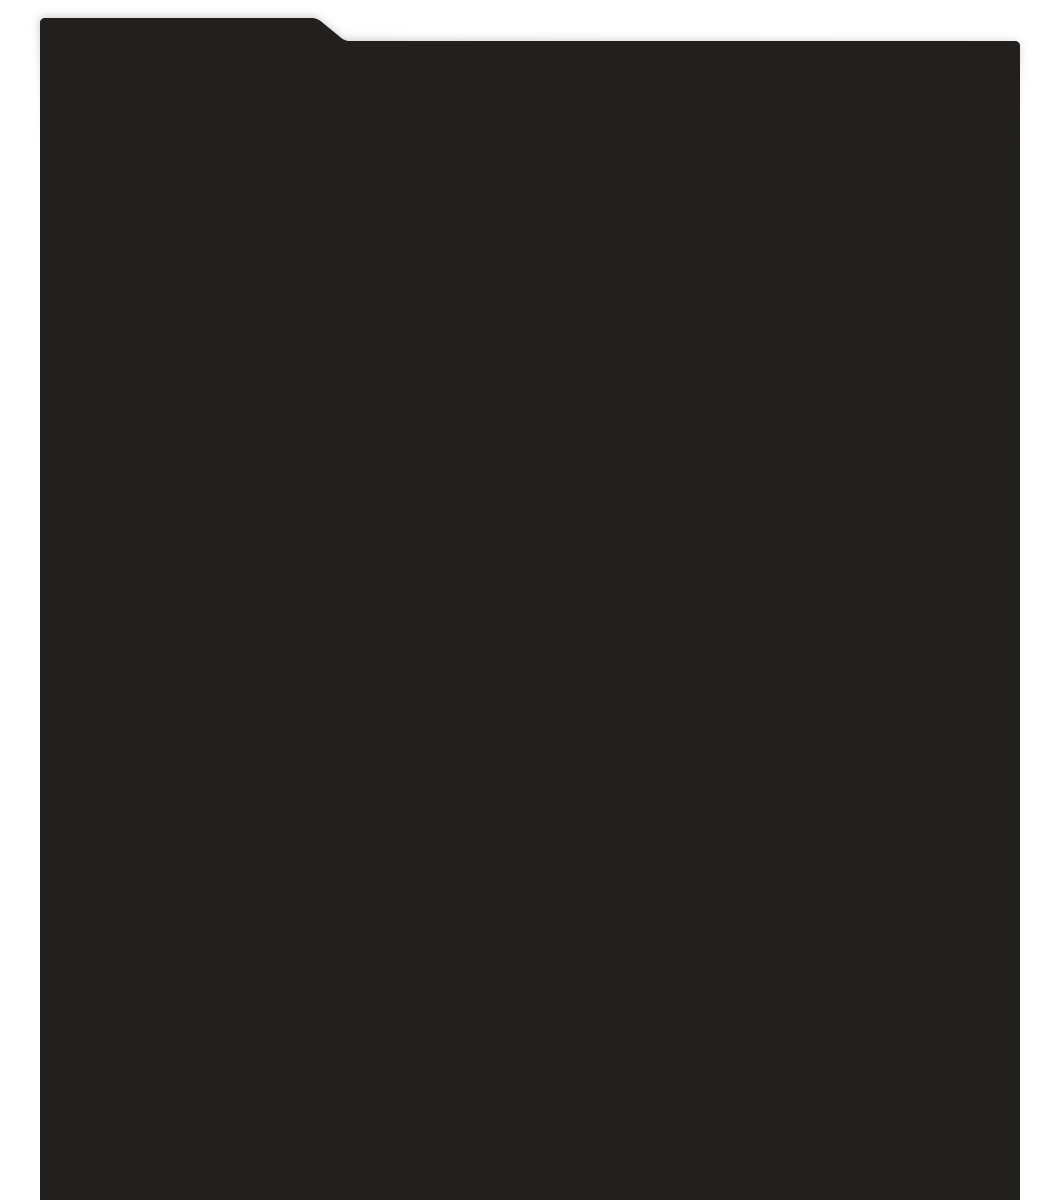
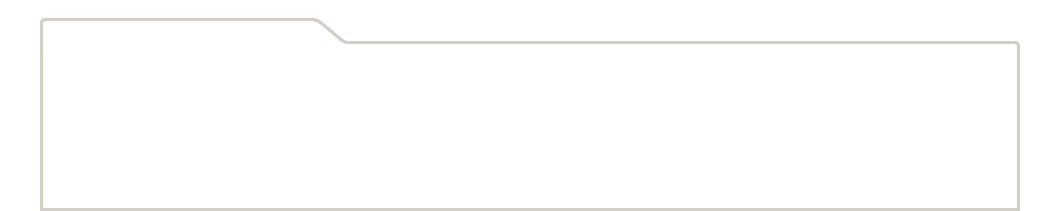
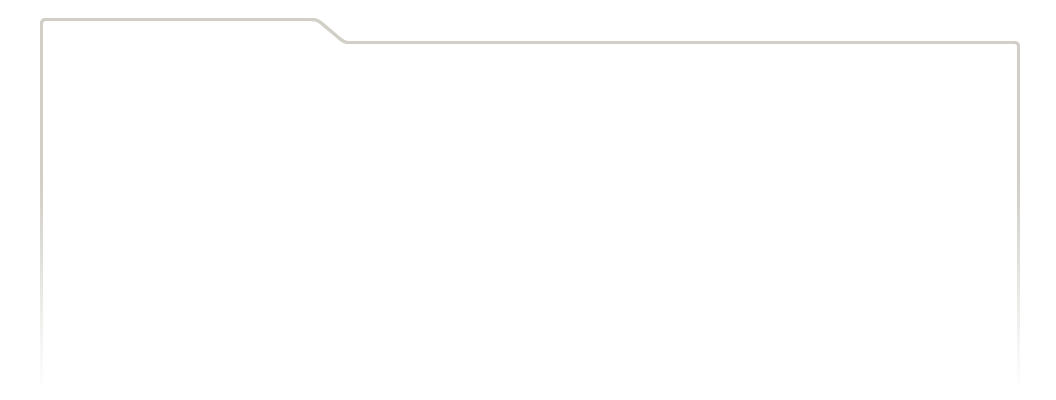
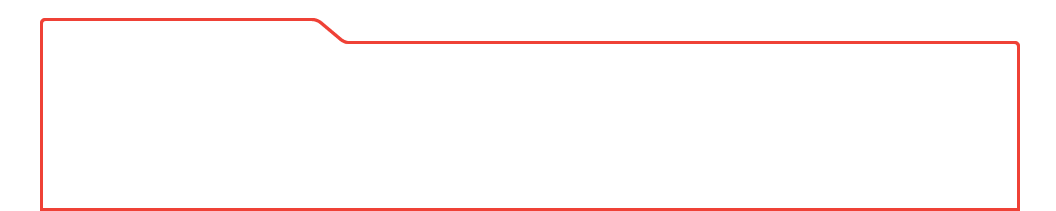
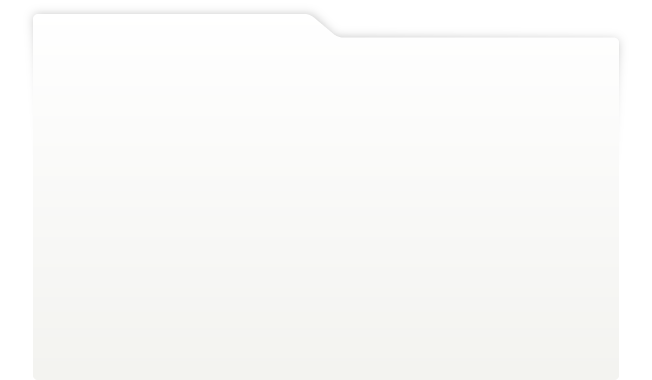
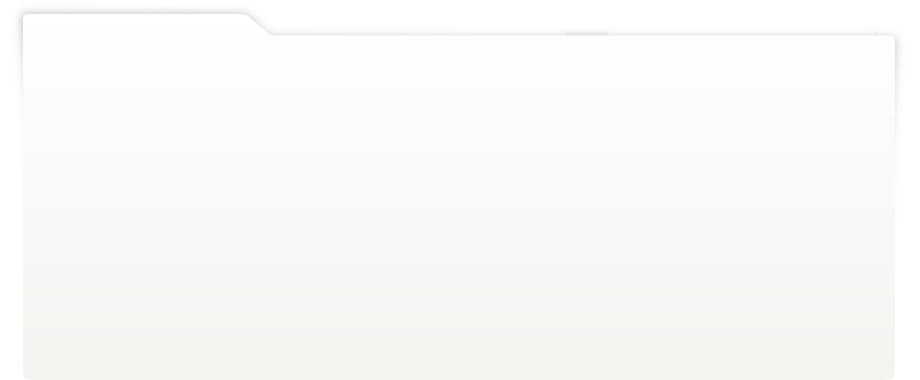
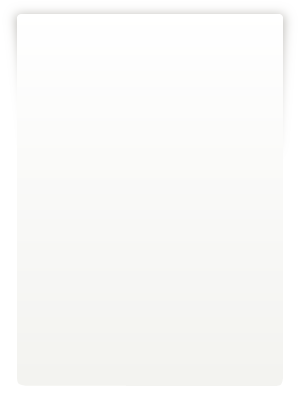
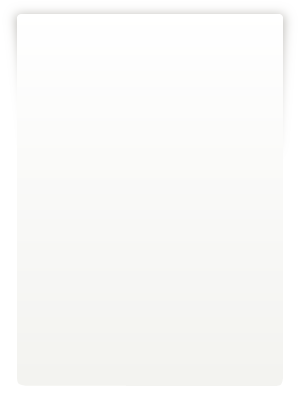
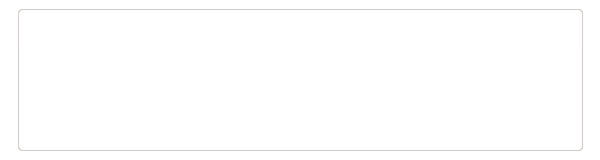
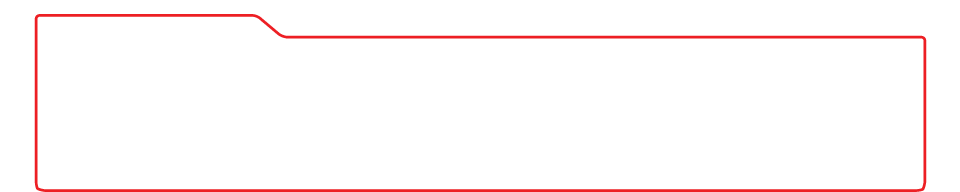
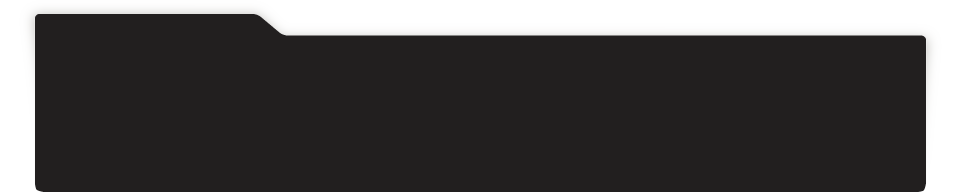
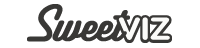
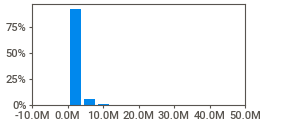
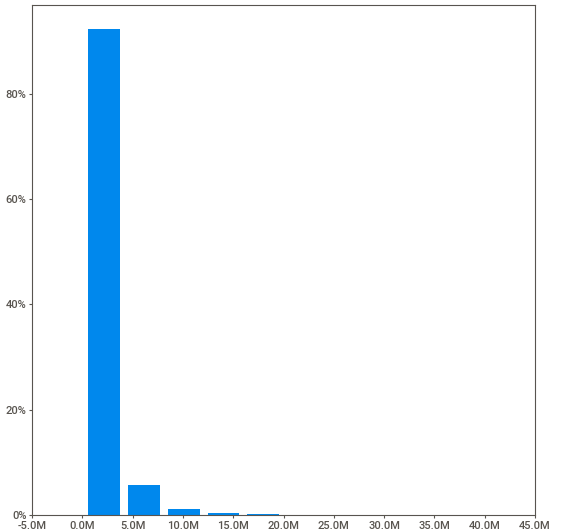
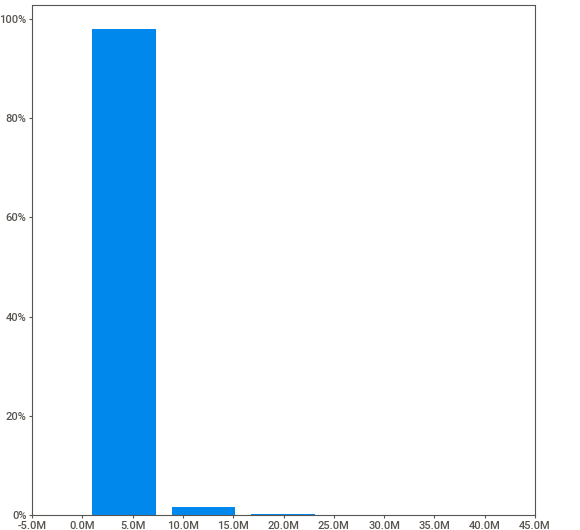
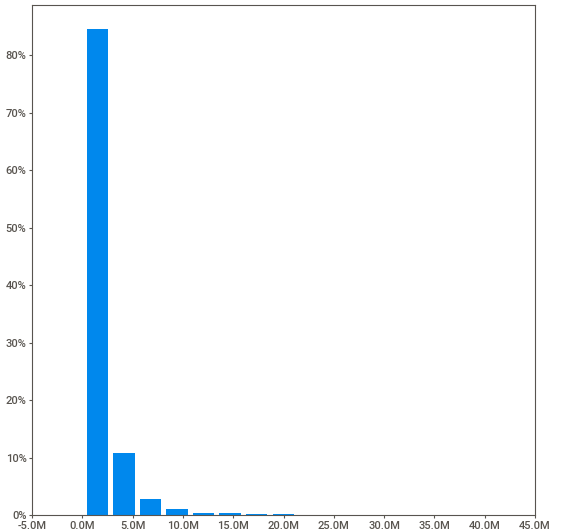
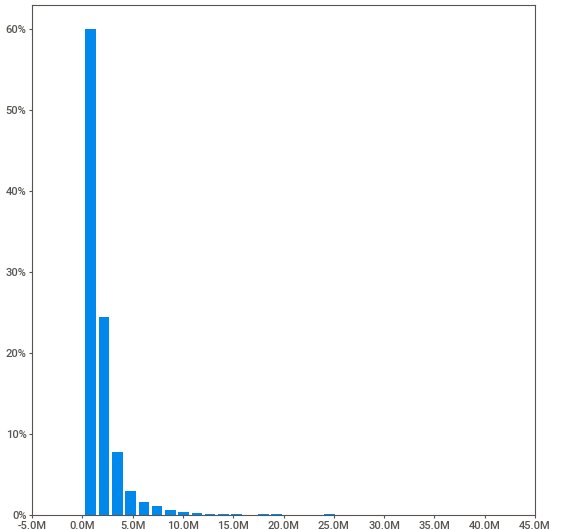
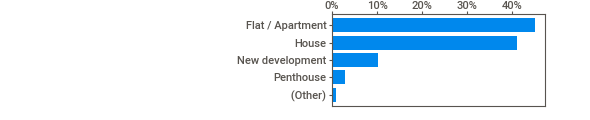
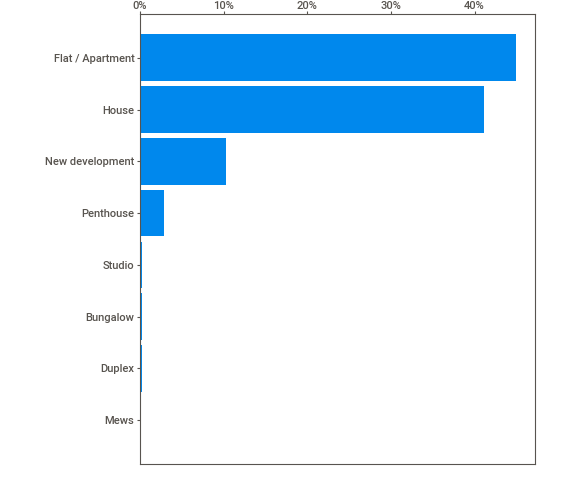
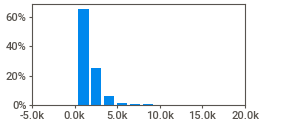
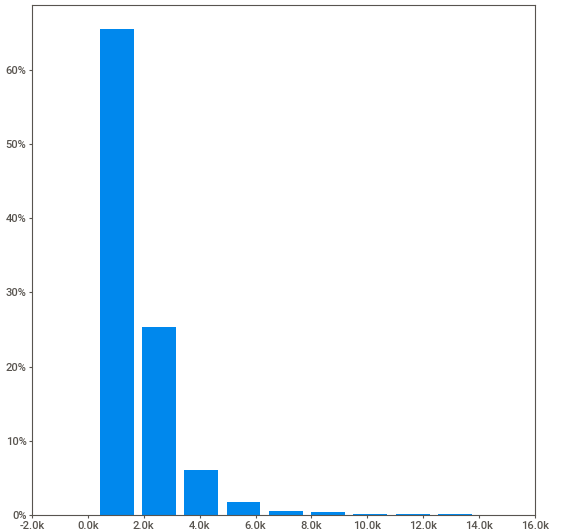
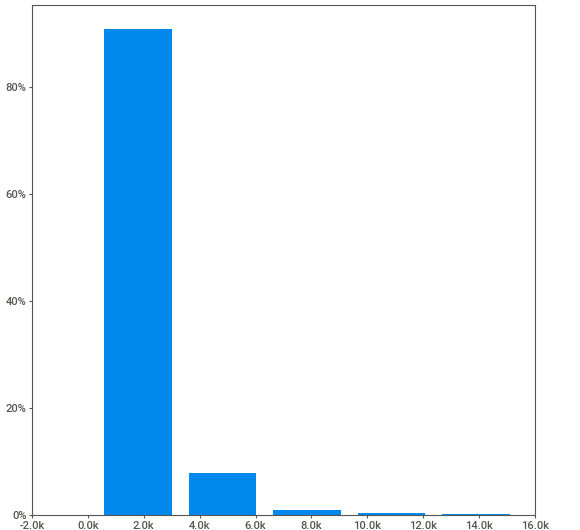
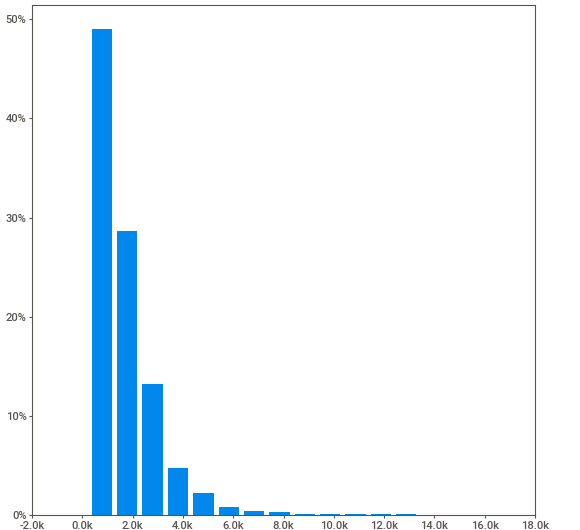
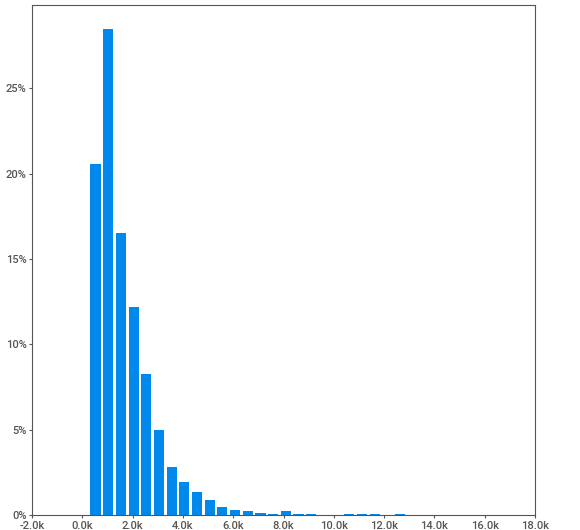
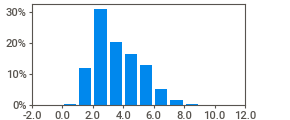
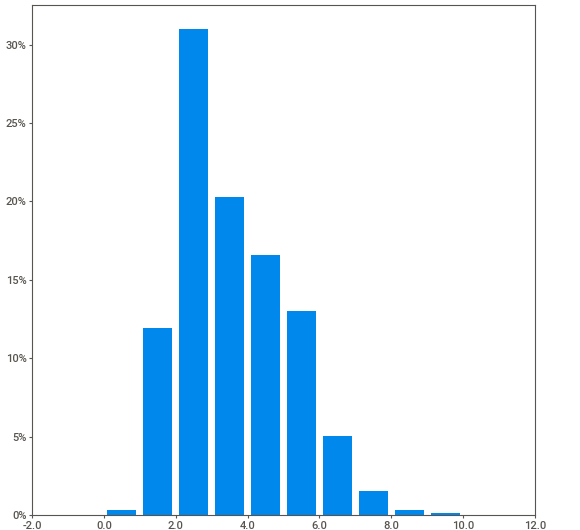
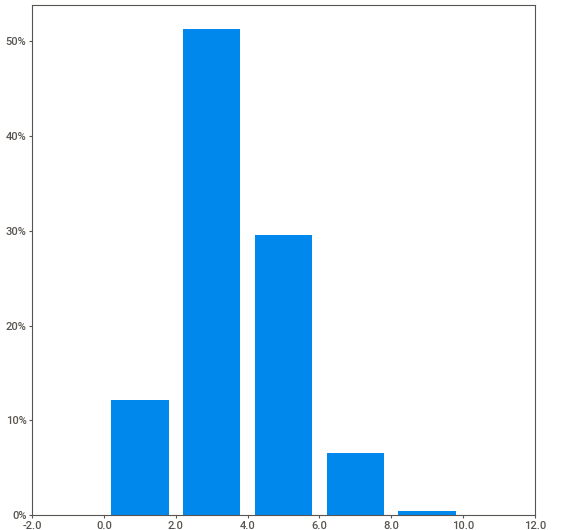
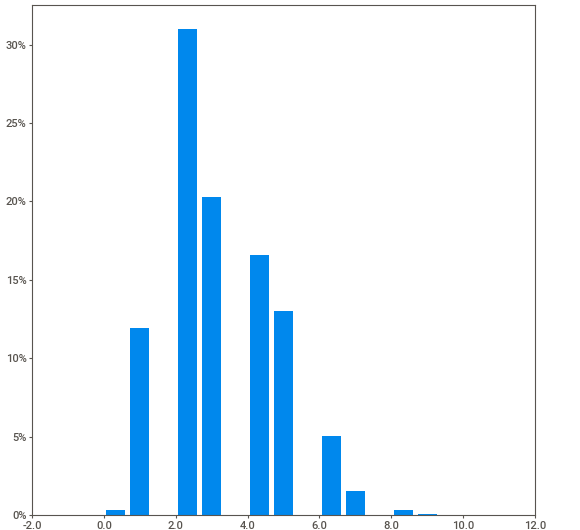
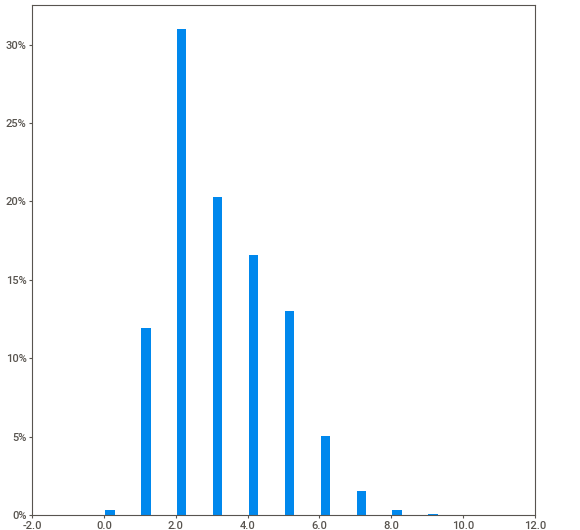
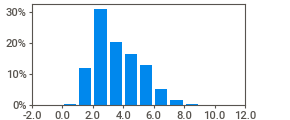
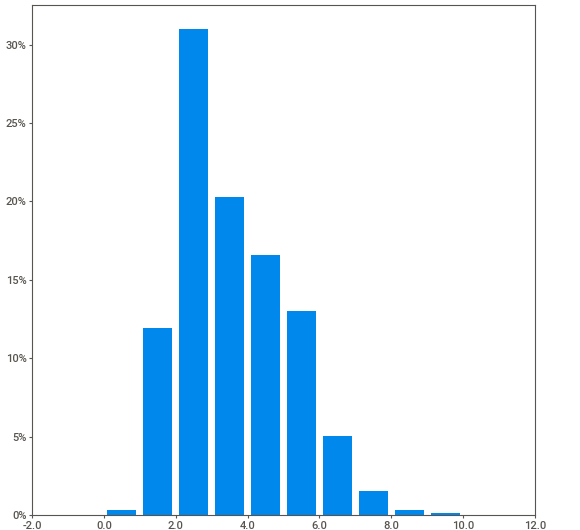
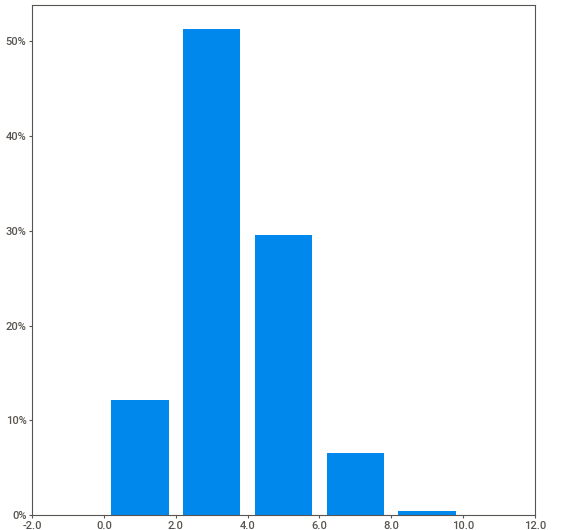
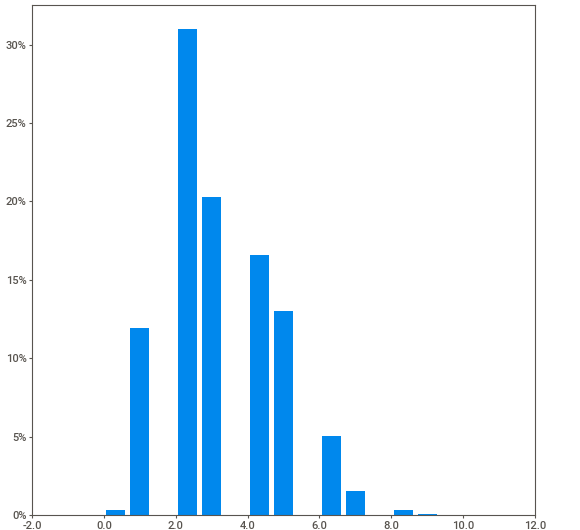
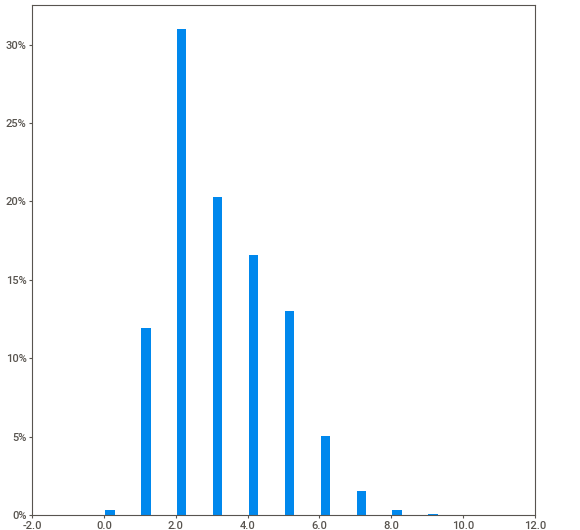
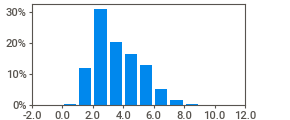
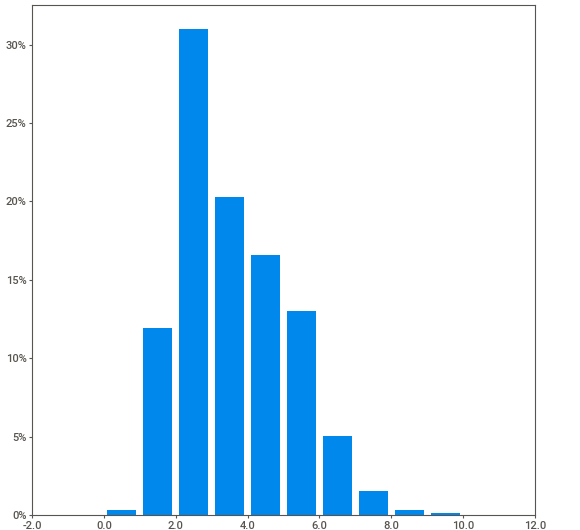
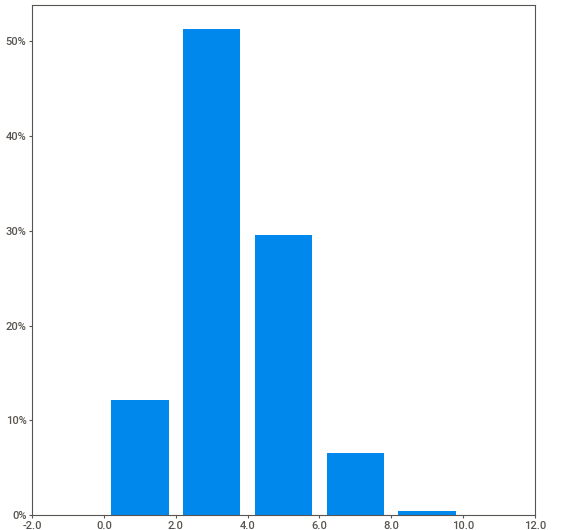
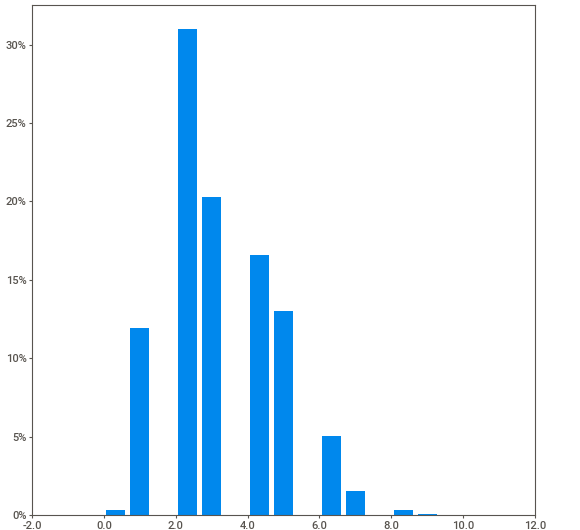
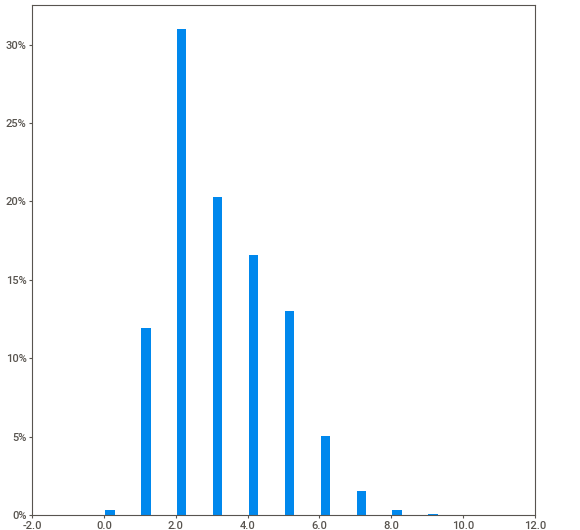
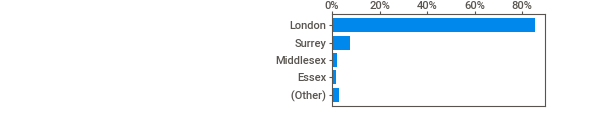
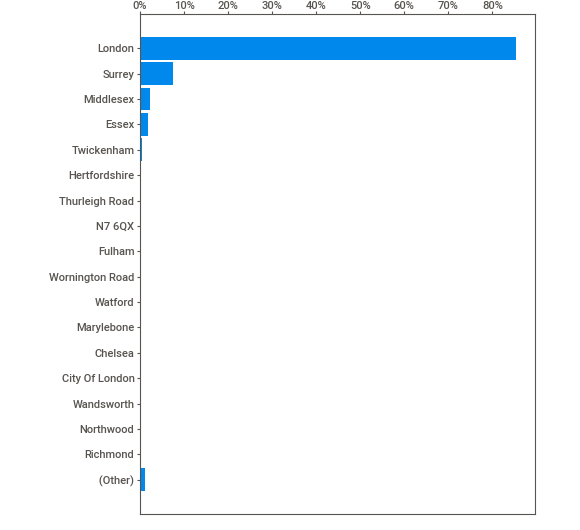
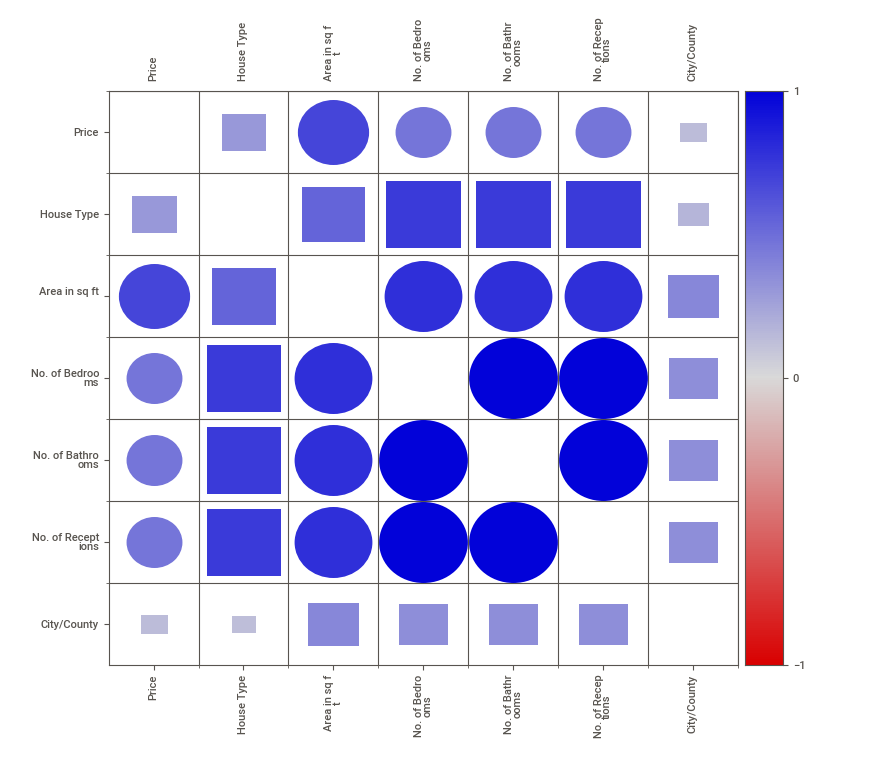
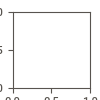

In [8]:
import sweetviz as sv

report = sv.analyze(data)
report.show_notebook()

# Preprocessing of data

### Encoding the text values having no null rows 

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
data['House Type']=le.fit_transform(data['House Type'])
data['City/County']=le.fit_transform(data['City/County'])
data['Postal Code']=le.fit_transform(data['Postal Code'])
data['Property Name']=le.fit_transform(data['Property Name'])

### heatmap before removing null values of columns 

<AxesSubplot:>

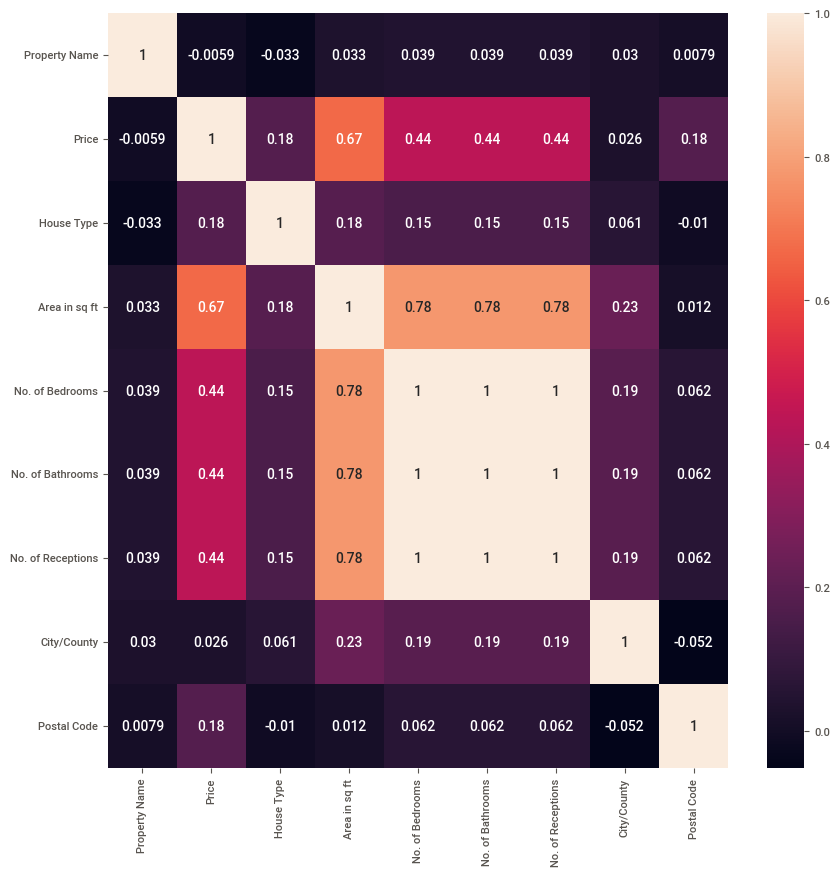

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## FIlling the null values of Location

In [12]:
location_null = np.array(df['Location'].isnull())
location_null[0]

False

In [13]:
# fill data in location 
missing_idx = []

for i in range(len(location_null)):
    if location_null[i]:
        missing_idx.append(i)
        
len(missing_idx)
        

962

In [14]:
#independent parameters
location_x_train = np.array([ [data['Property Name'][i],data['Price'][i],data['House Type'][i],data['Area in sq ft'][i],data['No. of Bedrooms'][i],data['No. of Bathrooms'][i],data['No. of Receptions'][i],data['City/County'][i],data['Postal Code'][i]] for i in range(df.shape[0]) if i not in missing_idx])

#dependent parameters
location_y_train = np.array([ [data['Location'][i]] for i in range(df.shape[0]) if i not in missing_idx])

location_x_test = np.array([ [data['Property Name'][i],data['Price'][i],data['House Type'][i],data['Area in sq ft'][i],data['No. of Bedrooms'][i],data['No. of Bathrooms'][i],data['No. of Receptions'][i],data['City/County'][i],data['Postal Code'][i]] for i in range(df.shape[0]) if i in missing_idx])

### importing classifer to predict Location

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
#model initialisation
location_model = SGDClassifier()

location_model.fit(location_x_train,location_y_train)

location_pred = location_model.predict(location_x_test)

C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#adding to dataframe
for n,i in enumerate(missing_idx):
    data['Location'][i]=location_pred[n]

#label encode after removing null values
data['Location']=le.fit_transform(data['Location'])

C:\Users\Devil\AppData\Local\Temp\ipykernel_17480\3256179563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location'][i]=location_pred[n]


In [18]:
data['Location'].describe()

count    3480.000000
mean      309.716954
std       196.124658
min         0.000000
25%       150.000000
50%       310.500000
75%       490.250000
max       655.000000
Name: Location, dtype: float64

### heatmap after removing null rows 

<AxesSubplot:>

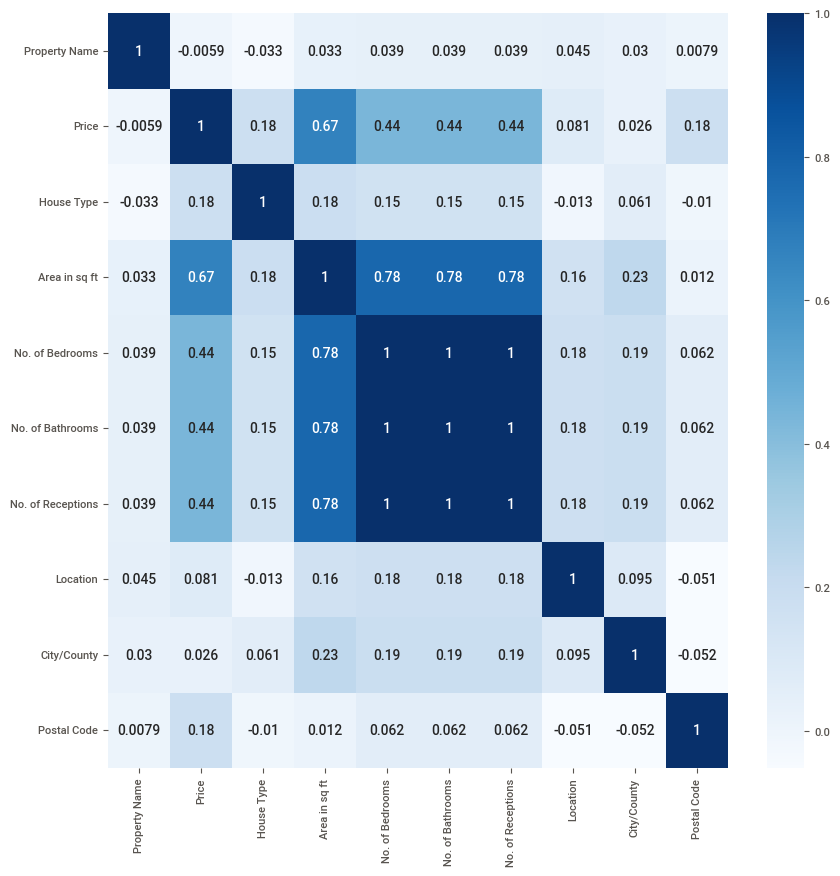

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

# Model 

In [20]:
df=data
df.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,1739,1675000,3,2716,5,5,5,650,33,1776
1,1888,650000,2,814,2,2,2,384,33,291
2,1147,735000,2,761,2,2,2,558,33,1448
3,850,1765000,3,1986,4,4,4,558,33,1438
4,1945,675000,2,700,2,2,2,558,33,1442


In [21]:
y = data['Price']
y.head(5)

0    1675000
1     650000
2     735000
3    1765000
4     675000
Name: Price, dtype: int64

In [22]:
X=data.drop(labels=['Price'],axis=1,inplace=False)
X.head(5)

,Property Name,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,1739,3,2716,5,5,5,650,33,1776
1,1888,2,814,2,2,2,384,33,291
2,1147,2,761,2,2,2,558,33,1448
3,850,3,1986,4,4,4,558,33,1438
4,1945,2,700,2,2,2,558,33,1442


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Random forest Classifier 

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [25]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
#prediction
y_pred = rfr.predict(X_test)

#model accuracy
print("Accuracy : {}".format(r2_score(y_test,y_pred)))

Accuracy : 0.6666550486968524


### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
#prediction
y_pred = lr.predict(X_test)

#model accuracy
print("Accuracy : {}".format(r2_score(y_test,y_pred)))

Accuracy : 0.4250545835987227


### Decision Tree Regressor 

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0)

In [32]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
#prediction
y_pred = dtr.predict(X_test)

#model accuracy
print("Accuracy : {}".format(r2_score(y_test,y_pred)))

Accuracy : 0.6017369244296775
